In [2]:
import tensorflow as tf

# !wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

In [3]:
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, walk_through_dir



In [4]:
train_dir = "10_food_classes_10_percent/train"
test_dir = "10_food_classes_10_percent/test"

In [7]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

IMG_SIZE = (224, 224)
train_data_10_percent = image_dataset_from_directory(train_dir,
													 image_size=IMG_SIZE,
													 label_mode="categorical")

test_data = image_dataset_from_directory(test_dir,
										image_size=IMG_SIZE,
										label_mode="categorical")


Found 750 files belonging to 10 classes.


Found 2500 files belonging to 10 classes.


In [10]:
train_data_10_percent, train_data_10_percent.class_names

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>,
 ['chicken_curry',
  'chicken_wings',
  'fried_rice',
  'grilled_salmon',
  'hamburger',
  'ice_cream',
  'pizza',
  'ramen',
  'steak',
  'sushi'])

In [11]:
for images, labels in train_data_10_percent.take(1):
	print(images, labels)

tf.Tensor(
[[[[ 93.94388     69.94388     41.94388   ]
   [102.2602      79.2602      47.92857   ]
   [115.07653     92.15306     57.92347   ]
   ...
   [126.07672    108.64819     93.0002    ]
   [137.88269    122.8827     101.8827    ]
   [138.51526    126.51526    102.51526   ]]

  [[ 86.76021     60.760204    33.760204  ]
   [ 89.20918     66.14286     35.341835  ]
   [ 96.          73.          40.85714   ]
   ...
   [132.342      113.98489    100.46952   ]
   [141.07655    126.07656    106.801025  ]
   [141.28564    126.285645   103.285645  ]]

  [[ 88.13776     62.137756    37.137756  ]
   [ 88.68367     62.683674    35.683674  ]
   [ 94.40306     71.188774    40.831635  ]
   ...
   [129.81139    111.428764   100.50013   ]
   [140.9286     123.50002    107.57143   ]
   [141.28564    124.352      103.51008   ]]

  ...

  [[145.43367    121.43366     85.86219   ]
   [143.80104    119.80104     84.22957   ]
   [148.21431    124.21431     88.97958   ]
   ...
   [136.13773    118.   

2024-03-19 15:37:48.904815: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [16]:
base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)

base_model.trainable = False

inputs = tf.keras.layers.Input(shape=(224, 224, 3), name="nput_layer")

# x = tf.keras.layers.experimental.preprocessing.Rescaling(1/255.0)(inputs)

x = base_model(inputs)
print(f"shape aer inputs: {x.shape}")

x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
print(f"shape after global pool: {x.shape}")

outputs = tf.keras.layers.Dense(10, activation="softmax", name="out_layer")(x)
print(f"shape after global pool: {x.shape}")

model_0 = tf.keras.Model(inputs, outputs)

model_0.compile(
	optimizer=tf.keras.optimizers.Adam(),
	loss="categorical_crossentropy",
	metrics=["accuracy"]
)

history_0 = model_0.fit(train_data_10_percent,
						validation_data=test_data,
						validation_steps=len(test_data) // 4,
						epochs=5,
						steps_per_epoch=len(test_data),
						callbacks=[create_tensorboard_callback(
							dir_name="transfer_learning", 
							experiment_name="10_percent")])

shape aer inputs: (None, 7, 7, 1280)
shape after global pool: (None, 1280)
shape after global pool: (None, 1280)
Saving TensorBoard log files to: transfer_learning/10_percent/20240319-160329
Epoch 1/5
24/79 ━━━━━━━━━━━━━━━━━━━━ 47s 870ms/step - accuracy: 0.2374 - loss: 2.1003

2024-03-19 16:04:03.752418: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/usr/lib/python3.11/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


79/79 ━━━━━━━━━━━━━━━━━━━━ 52s 498ms/step - accuracy: 0.3515 - loss: 1.8952 - val_accuracy: 0.7516 - val_loss: 1.3094
Epoch 2/5
24/79 ━━━━━━━━━━━━━━━━━━━━ 47s 865ms/step - accuracy: 0.7250 - loss: 1.2537

2024-03-19 16:04:43.510565: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


79/79 ━━━━━━━━━━━━━━━━━━━━ 39s 484ms/step - accuracy: 0.7410 - loss: 1.1485 - val_accuracy: 0.8421 - val_loss: 0.8832
Epoch 3/5
24/79 ━━━━━━━━━━━━━━━━━━━━ 52s 948ms/step - accuracy: 0.7837 - loss: 0.8950

2024-03-19 16:05:24.316959: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


79/79 ━━━━━━━━━━━━━━━━━━━━ 41s 517ms/step - accuracy: 0.7997 - loss: 0.8378 - val_accuracy: 0.8569 - val_loss: 0.6927
Epoch 4/5
24/79 ━━━━━━━━━━━━━━━━━━━━ 52s 953ms/step - accuracy: 0.8324 - loss: 0.7226

2024-03-19 16:06:05.741035: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


79/79 ━━━━━━━━━━━━━━━━━━━━ 41s 508ms/step - accuracy: 0.8423 - loss: 0.6820 - val_accuracy: 0.8306 - val_loss: 0.6433
Epoch 5/5
24/79 ━━━━━━━━━━━━━━━━━━━━ 48s 877ms/step - accuracy: 0.8548 - loss: 0.6115

2024-03-19 16:06:44.648694: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


79/79 ━━━━━━━━━━━━━━━━━━━━ 23s 286ms/step - accuracy: 0.8631 - loss: 0.5826 - val_accuracy: 0.8382 - val_loss: 0.5209


2024-03-19 16:06:46.548900: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


In [17]:
model_0.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 72s 911ms/step - accuracy: 0.8732 - loss: 0.5489


[0.5619129538536072, 0.8604000210762024]

In [18]:
for layer_number, layer in enumerate(base_model.layers):
	print(layer_number, layer.name)

0 input_layer_4
1 rescaling_4
2 normalization_4
3 stem_conv
4 stem_bn
5 stem_activation
6 block1a_project_conv
7 block1a_project_bn
8 block1a_project_activation
9 block2a_expand_conv
10 block2a_expand_bn
11 block2a_expand_activation
12 block2a_project_conv
13 block2a_project_bn
14 block2b_expand_conv
15 block2b_expand_bn
16 block2b_expand_activation
17 block2b_project_conv
18 block2b_project_bn
19 block2b_drop
20 block2b_add
21 block3a_expand_conv
22 block3a_expand_bn
23 block3a_expand_activation
24 block3a_project_conv
25 block3a_project_bn
26 block3b_expand_conv
27 block3b_expand_bn
28 block3b_expand_activation
29 block3b_project_conv
30 block3b_project_bn
31 block3b_drop
32 block3b_add
33 block4a_expand_conv
34 block4a_expand_bn
35 block4a_expand_activation
36 block4a_dwconv2
37 block4a_bn
38 block4a_activation
39 block4a_se_squeeze
40 block4a_se_reshape
41 block4a_se_reduce
42 block4a_se_expand
43 block4a_se_excite
44 block4a_project_conv
45 block4a_project_bn
46 block4b_expand_con

In [19]:
base_model.summary()

Model: "efficientnetv2-b0"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, None,      │          0 │ -                 │
│ (InputLayer)        │ None, 3)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_4         │ (None, None,      │          0 │ input_layer_4[0]… │
│ (Rescaling)         │ None, 3)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization_4     │ (None, None,      │          0 │ rescaling_4[0][0] │
│ (Normalization)     │ None, 3)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, None,      │        864 │ normalization_4[… │
│                     │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, None,      │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, None,      │          0 │ stem_bn[0][0]     │
│ (Activation)        │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, None,      │      4,608 │ stem_activation[… │
│ (Conv2D)            │ None, 16)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_bn  │ (None, None,      │         64 │ block1a_project_… │
│ (BatchNormalizatio… │ None, 16)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_ac… │ (None, None,      │          0 │ block1a_project_… │
│ (Activation)        │ None, 16)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_expand_conv │ (None, None,      │      9,216 │ block1a_project_… │
│ (Conv2D)            │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_expand_bn   │ (None, None,      │        256 │ block2a_expand_c… │
│ (BatchNormalizatio… │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_expand_act… │ (None, None,      │          0 │ block2a_expand_b… │
│ (Activation)        │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_project_co… │ (None, None,      │      2,048 │ block2a_expand_a… │
│ (Conv2D)            │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_project_bn  │ (None, None,      │        128 │ block2a_project_… │
│ (BatchNormalizatio… │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2b_expand_conv │ (None, None,      │     36,864 │ block2a_project_… │
│ (Conv2D)            │ None, 128)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2b_expand_bn   │ (None, None,      │        512 │ block2b_expand_c… │
│ (BatchNormalizatio… │ None, 128)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2b_expand_act… │ (None, None,      │          0 │ block2b_expand_b

 Total params: 5,919,312 (22.58 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 5,919,312 (22.58 MB)

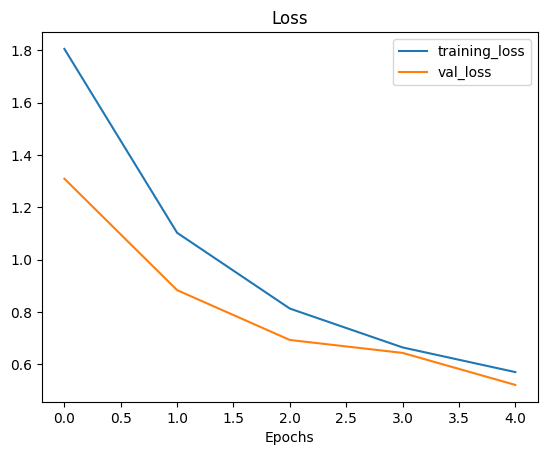

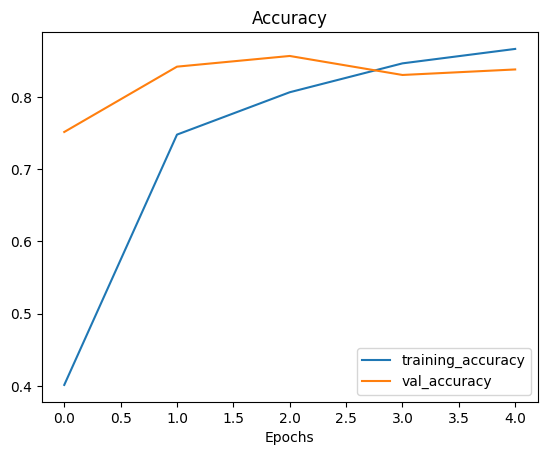

In [20]:
plot_loss_curves(history_0)

In [25]:
input_shape = (1, 4, 4, 3)

tf.random.set_seed(42)
input_tensor = tf.random.normal(input_shape)
# print(input_tensor)

global_average_pooled_tensor = tf.keras.layers.GlobalAveragePooling2D()(input_tensor)
print(global_average_pooled_tensor)

tf.Tensor([[-0.09368646 -0.45840445 -0.28855976]], shape=(1, 3), dtype=float32)
